<a href="https://colab.research.google.com/github/Ttanvi996/Oasis-OIBSIP/blob/main/irisflowerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']
data = pd.read_csv('Iris.csv', names=columns)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [ ]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width,Species
count,151,151,151,151,151
unique,36,24,44,23,4
top,5.0,3.0,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [ ]:
a = len(data[data['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",a)

No of Versicolor in Dataset: 50


In [ ]:
b = len(data[data['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",b)

No of Virginica in Dataset: 50


In [ ]:
c = len(data[data['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",c)

No of Setosa in Dataset: 50


<Axes: ylabel='Species'>

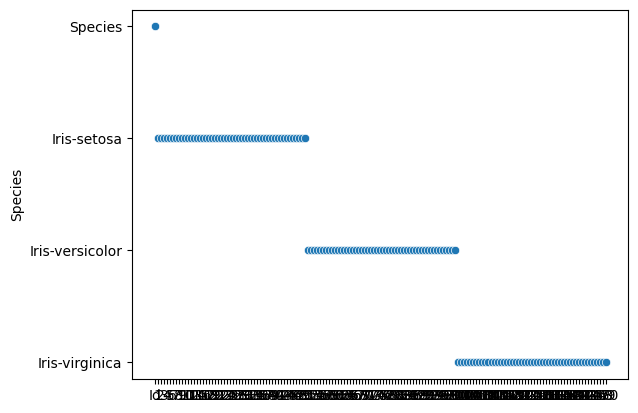

In [ ]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.scatterplot(data ['Species'])

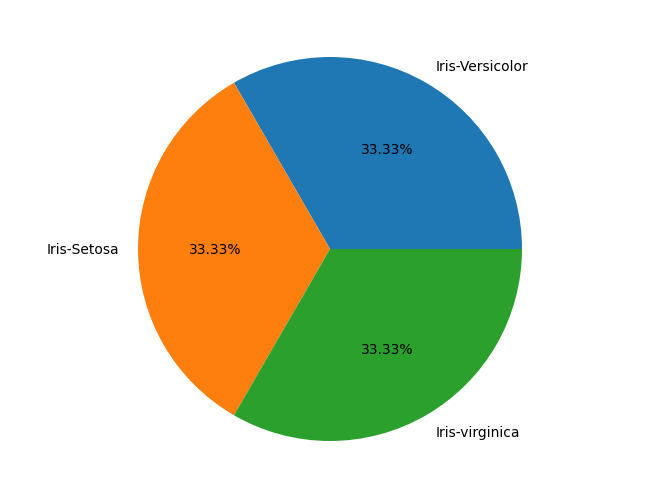

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-Versicolor', 'Iris-Setosa', 'Iris-virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data, x="Sepal width", y="Sepal length", color="Species")
fig.show()

In [ ]:
print("Target Labels", data["Species"].unique())

Target Labels ['Species' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
x = data.drop("Species", axis=1)
y = data["Species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(["Species"],axis=1)
X

,Sepal length,Sepal width,Petal length,Petal width
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [ ]:
Y = data["Species"]
Y

Id            Species
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 151, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
model = LogisticRegression(max_iter=1000)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
model.fit(x_test,y_test)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.linear_model import LinearRegression
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print("Confusion Matrix\n",confusion_matrix(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        46
      macro avg       0.96      0.96      0.96        46
   weighted avg       0.96      0.96      0.96        46

Confusion Matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 13]]


In [ ]:
print(accuracy_score(y_test,predictions))

0.9565217391304348


In [ ]:
from sklearn.preprocessing import StandardScaler
new_data = pd.DataFrame({
    'SepalLengthCm': [ 5.1, 6.9],
    'SepalWidthCm': [3.5, 3.1],
    'PetalLengthCm': [1.4, 4.9],
    'PetalWidthCm': [0.2, 1.5]
})

# Scale the new data using the StandardScaler
scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)

# Use the trained logistic regression model to predict the species of the new data
predicted_species = model.predict(scaled_new_data)

# Print the predicted species
print(predicted_species)

['Iris-setosa' 'Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
